## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [31]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing
from sklearn.impute import KNNImputer

## 讀入資料

In [3]:
df_train = pd.read_csv("Titanic_train.csv")

## 觀察 Age

In [6]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
le = preprocessing.LabelEncoder()
df_train['Sex'] = preprocessing.LabelEncoder().fit_transform(df_train['Sex'])


df_train['Age'].corr(other = df_train['Pclass']),df_train['Age'].corr(other = df_train['Sex'])

(-0.36922601531551724, 0.09325357685567742)

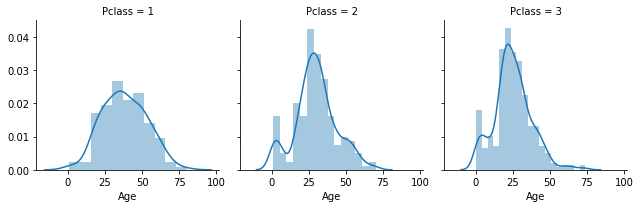

In [28]:
g = sns.FacetGrid(data=df_train , col='Pclass')
g.map(sns.distplot ,'Age')
plt.show()

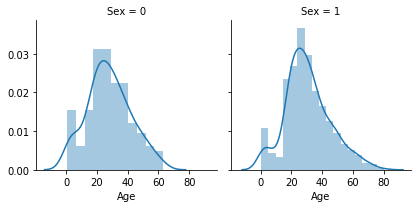

In [30]:
g = sns.FacetGrid(data = df_train , col='Sex')
g.map(sns.distplot , 'Age')
plt.show()

In [53]:
data = df_train[['Age','Pclass','Sex']]

data_filled = pd.DataFrame(KNNImputer(n_neighbors=3).fit_transform(data))
data_filled = data_filled.rename(columns = {0:'Age',
                              1:'Pclass',
                              2:'Sex'})
print(data_filled.isna().sum())
display(data_filled)

Age       0
Pclass    0
Sex       0
dtype: int64


,Age,Pclass,Sex
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,19.0,3.0,0.0
889,26.0,1.0,1.0
